
# Multi-objective Bayesian Optimization


TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
import os
SMOKE_TEST = os.environ.get("SMOKE_TEST")
NUM_STEPS = 2 if SMOKE_TEST else 50

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

import torch
from xopt import Xopt
import yaml


YAML = """
xopt: {}
generator:
    name: mobo
    n_initial: 5
    optim:
        num_restarts: 20
        raw_samples: 20
    acq:
        reference_point: {y1: 1.5, y2: 1.5}

evaluator:
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE, y2: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    constants: {a: dummy_constant}

"""

In [2]:
X = Xopt(config=yaml.safe_load(YAML))
X.step()
for i in range(NUM_STEPS):
    print(i)
    X.step()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [3]:
X.generator.data

,x1,x2,a,y1,y2,c1,c2,some_array,xopt_runtime,xopt_error
1,2.323521,0.230816,dummy_constant,2.323521,0.230816,4.453367,3.397688,"[1, 2, 3]",0.000055,False
2,1.960602,1.524213,dummy_constant,1.960602,1.524213,5.208187,3.182373,"[1, 2, 3]",0.000015,False
3,2.782478,1.383827,dummy_constant,2.782478,1.383827,8.611893,5.990855,"[1, 2, 3]",0.000011,False
4,0.709073,1.206763,dummy_constant,0.709073,1.206763,1.019248,0.543225,"[1, 2, 3]",0.000010,False
5,0.776857,1.113566,dummy_constant,0.776857,1.113566,0.938416,0.453113,"[1, 2, 3]",0.000010,False
6,2.653303,1.170229,dummy_constant,2.653303,1.170229,7.315968,5.085921,"[1, 2, 3]",0.000042,False
7,2.219100,0.548791,dummy_constant,2.219100,0.548791,4.299598,2.957687,"[1, 2, 3]",0.000044,False
8,2.602591,1.979266,dummy_constant,2.602591,1.979266,9.746822,6.609114,"[1, 2, 3]",0.000042,False
9,0.760803,0.475625,dummy_constant,0.760803,0.475625,-0.106507,0.068612,"[1, 2, 3]",0.000040,False
10,1.017028,0.132221,dummy_constant,1.017028,0.132221,0.099572,0.402580,"[1, 2, 3]",0.000045,False


## plot results


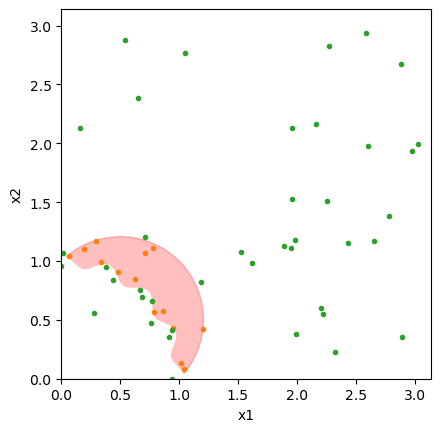

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots()

theta = np.linspace(0, np.pi / 2)
r = np.sqrt(1 + 0.1 * np.cos(16 * theta))
x_1 = r * np.sin(theta)
x_2_lower = r * np.cos(theta)
x_2_upper = (0.5 - (x_1 - 0.5) ** 2) ** 0.5 + 0.5

z = np.zeros_like(x_1)

# ax2.plot(x_1, x_2_lower,'r')
ax.fill_between(x_1, z, x_2_lower, fc="white")
circle = plt.Circle(
    (0.5, 0.5), 0.5 ** 0.5, color="r", alpha=0.25, zorder=0, label="Valid Region"
)
ax.add_patch(circle)
history = pd.concat(
    [X.data, X.vocs.feasibility_data(X.data)], axis=1, ignore_index=False
)


ax.plot(*history[["x1", "x2"]][history["feasible"]].to_numpy().T, ".C1")
ax.plot(*history[["x1", "x2"]][~history["feasible"]].to_numpy().T, ".C2")

ax.set_xlim(0, 3.14)
ax.set_ylim(0, 3.14)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_aspect("equal")

### Plot path through input space

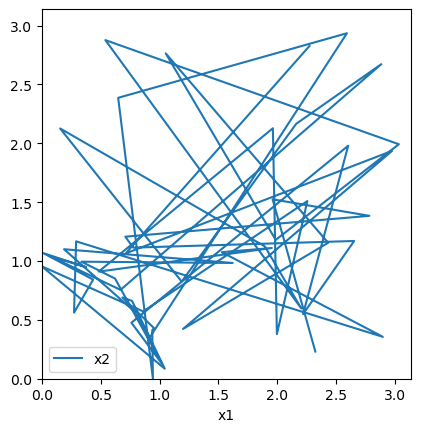

In [5]:
ax = history.plot("x1", "x2")
ax.set_ylim(0, 3.14)
ax.set_xlim(0, 3.14)
ax.set_aspect("equal")

[[2.43907121 2.13540712]]


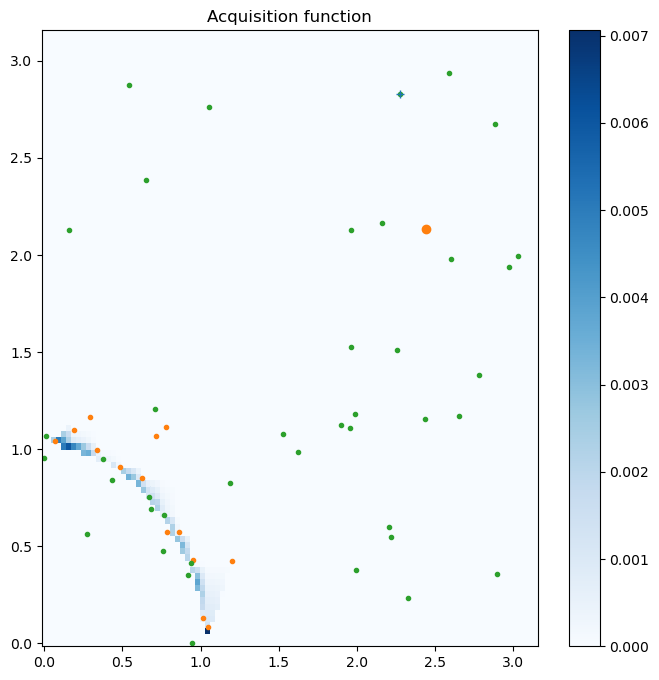

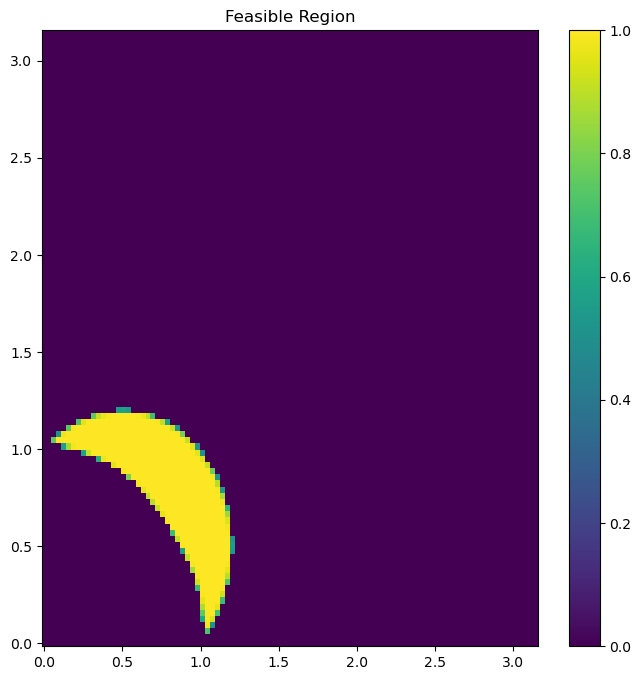

In [6]:
# plot the acquisition function
from xopt.generators.bayesian.objectives import feasibility

bounds = X.generator.vocs.bounds
model = X.generator.model

# create mesh
n = 100
x = torch.linspace(*bounds.T[0], n)
y = torch.linspace(*bounds.T[1], n)
xx, yy = torch.meshgrid(x, y)
pts = torch.hstack([ele.reshape(-1, 1) for ele in (xx, yy)]).double()

acq_func = X.generator.get_acquisition(model)
with torch.no_grad():
    acq_pts = pts.unsqueeze(1)
    acq = acq_func(acq_pts)

    fig, ax = plt.subplots(figsize=(8,8))
    c = ax.pcolor(xx, yy, acq.reshape(n, n), cmap="Blues")
    fig.colorbar(c)
    ax.set_title("Acquisition function")

    ax.plot(*history[["x1", "x2"]][history["feasible"]].to_numpy().T, ".C1")
    ax.plot(*history[["x1", "x2"]][~history["feasible"]].to_numpy().T, ".C2")

    ax.plot(*history[["x1", "x2"]].to_numpy()[-1].T, "+")

    feas = feasibility(pts.unsqueeze(1), model, X.generator.sampler, X.vocs).flatten()

    fig2, ax2 = plt.subplots(figsize=(8,8))
    c = ax2.pcolor(xx, yy, feas.reshape(n, n))
    fig2.colorbar(c)
    ax2.set_title("Feasible Region")

candidate = X.generator.generate(1)
print(candidate[["x1", "x2"]].to_numpy())
ax.plot(*candidate[["x1", "x2"]].to_numpy()[0], "o")